In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from category_encoders.target_encoder import TargetEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
 

In [2]:
rain_df = pd.read_csv('C:/Users/GAURAV/Jupyter Scripts/Data/Rain_in_AUS.csv')
rain_df.head()
rain_df.shape

(145460, 23)

In [3]:
rain_df.info()
rain_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
rain_df.isnull().sum()/len(rain_df)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [4]:
rain_df.drop(['Date', 'Rainfall', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

In [5]:
rain_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [6]:
rain_df.isnull().sum()/len(rain_df)*100
# df['Location'].value_counts()

Location         0.000000
MinTemp          0.332417
MaxTemp          0.218060
WindGustDir      6.508413
WindGustSpeed    6.467216
WindDir9am       6.861429
WindDir3pm       2.606775
WindSpeed9am     0.749359
WindSpeed3pm     1.797751
Humidity9am      1.077514
Humidity3pm      2.486735
Pressure9am      9.761555
Pressure3pm      9.780022
Temp9am          0.465952
Temp3pm          1.863808
RainToday        0.000000
RainTomorrow     0.000000
dtype: float64

In [7]:
categorical_column = [col for col in rain_df.columns if rain_df[col].dtypes == 'O']
numerical_column = [col for col in rain_df.columns if rain_df[col].dtypes != 'O']
print(numerical_column)
print(categorical_column)

['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
X = rain_df.iloc[:, :16]
y = rain_df.iloc[:,-1]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Converting y_train, y_test back to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_train.columns
# X_train.shape,X_test.shape, y_train.shape, y_test.shape

Index(['Location', 'MinTemp', 'MaxTemp', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [9]:
print(X_test.isnull().sum())
print(y_test)

Location            0
MinTemp           134
MaxTemp            97
WindGustDir      2734
WindGustSpeed    2719
WindDir9am       2904
WindDir3pm       1083
WindSpeed9am      308
WindSpeed3pm      724
Humidity9am       474
Humidity3pm      1036
Pressure9am      4065
Pressure3pm      4069
Temp9am           203
Temp3pm           763
RainToday           0
dtype: int64
       RainTomorrow
121459           No
32051           Yes
107700           No
26526            No
109566           No
...             ...
40982            No
90306            No
91470            No
16112            No
76134            No

[42237 rows x 1 columns]


### Handling missing values

In [10]:
# Imputing categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# [:-1] as RainTomorrow is target variable
for col in categorical_column[:-1]:    
    X_train[[col]] = categorical_imputer.fit_transform(X_train[[col]])
    X_test[[col]] = categorical_imputer.fit_transform(X_test[[col]])

In [11]:
# Imputing numerical columns
numerical_imputer = SimpleImputer(strategy='median')

for col in numerical_column:    
    X_train[[col]] = numerical_imputer.fit_transform(X_train[[col]])
    X_test[[col]] = numerical_imputer.fit_transform(X_test[[col]])

In [12]:
# X_train.isnull().sum()
# X_test.isnull().sum()

In [13]:
# next we have to handle outliers and then encoding the categorical columns
categorical_column

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

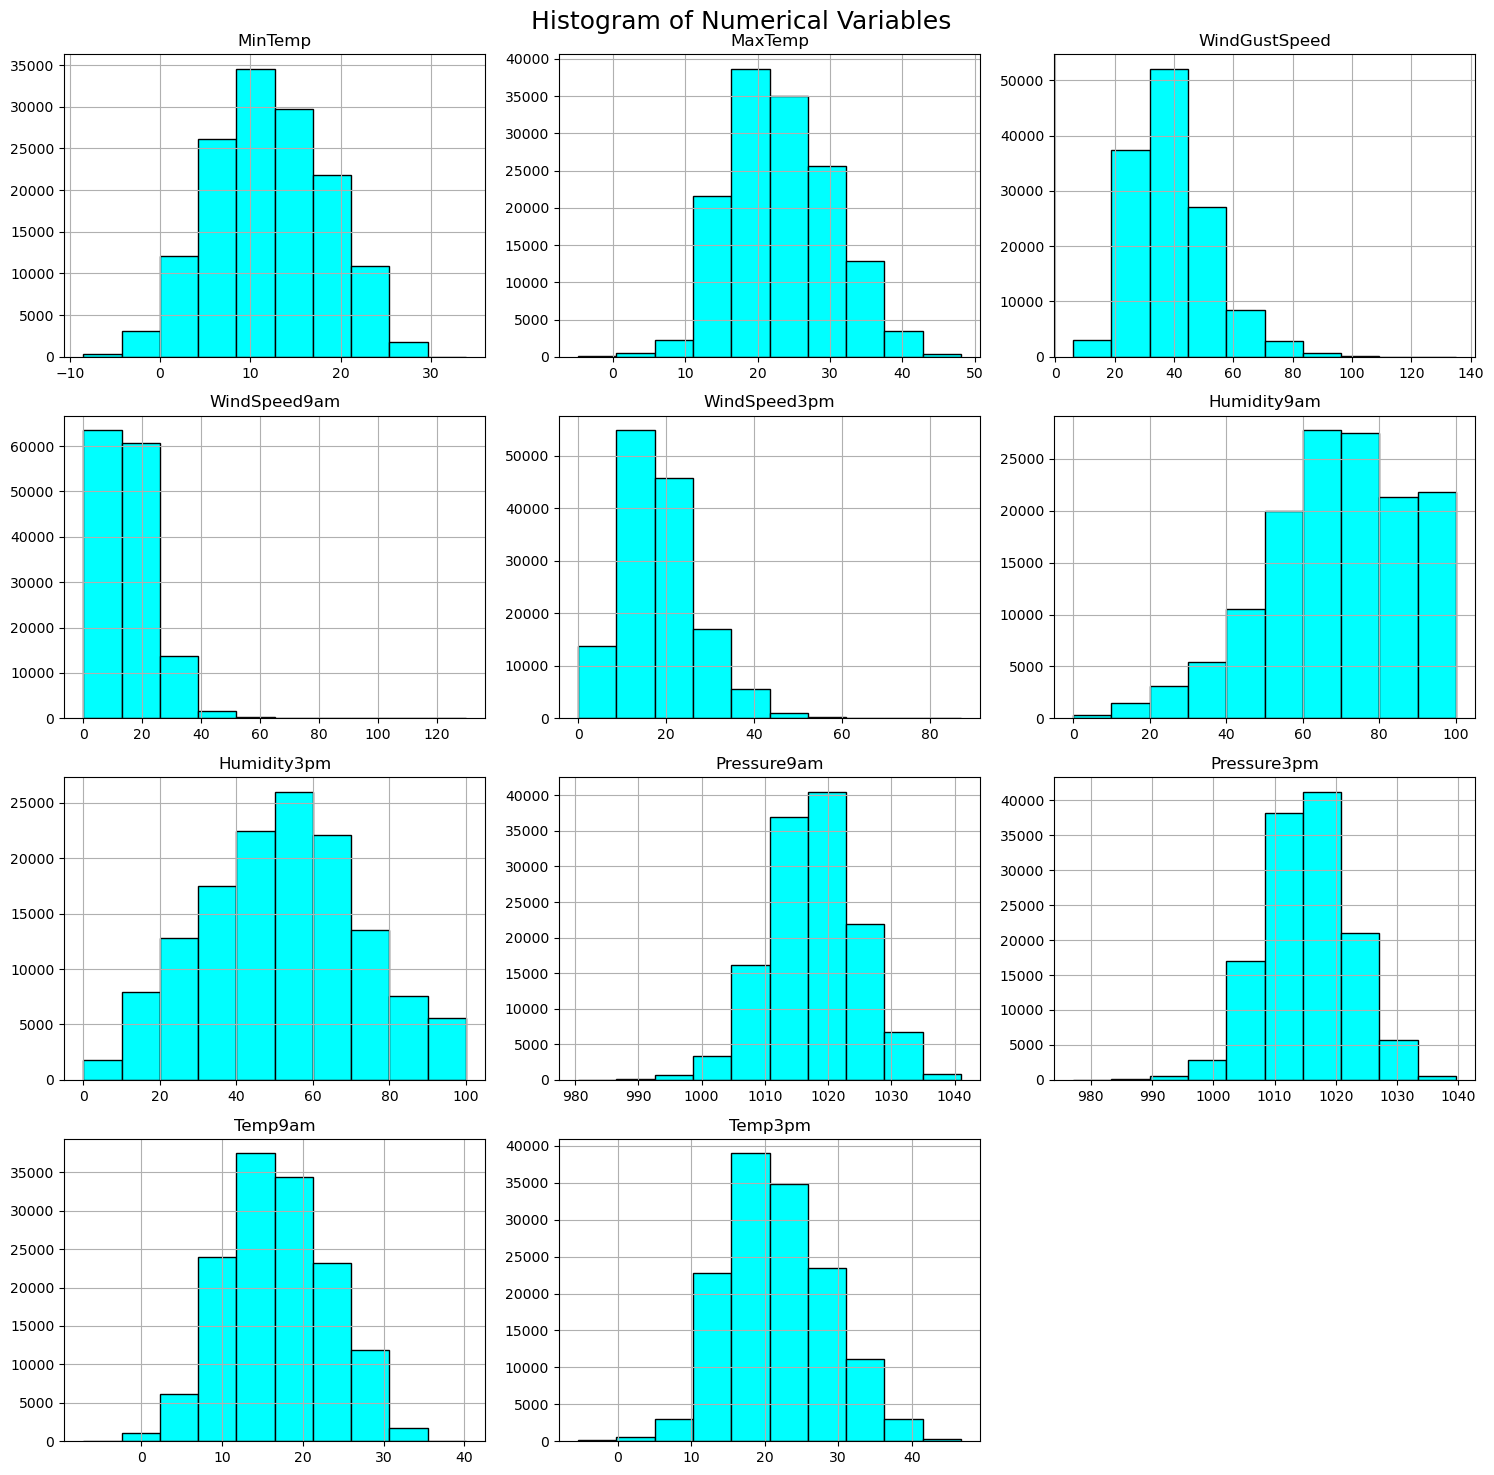

In [14]:
rain_df[numerical_column].hist(figsize=(15, 15), edgecolor='k', color='cyan')
plt.suptitle('Histogram of Numerical Variables ', fontsize=18)
plt.tight_layout()
plt.show()

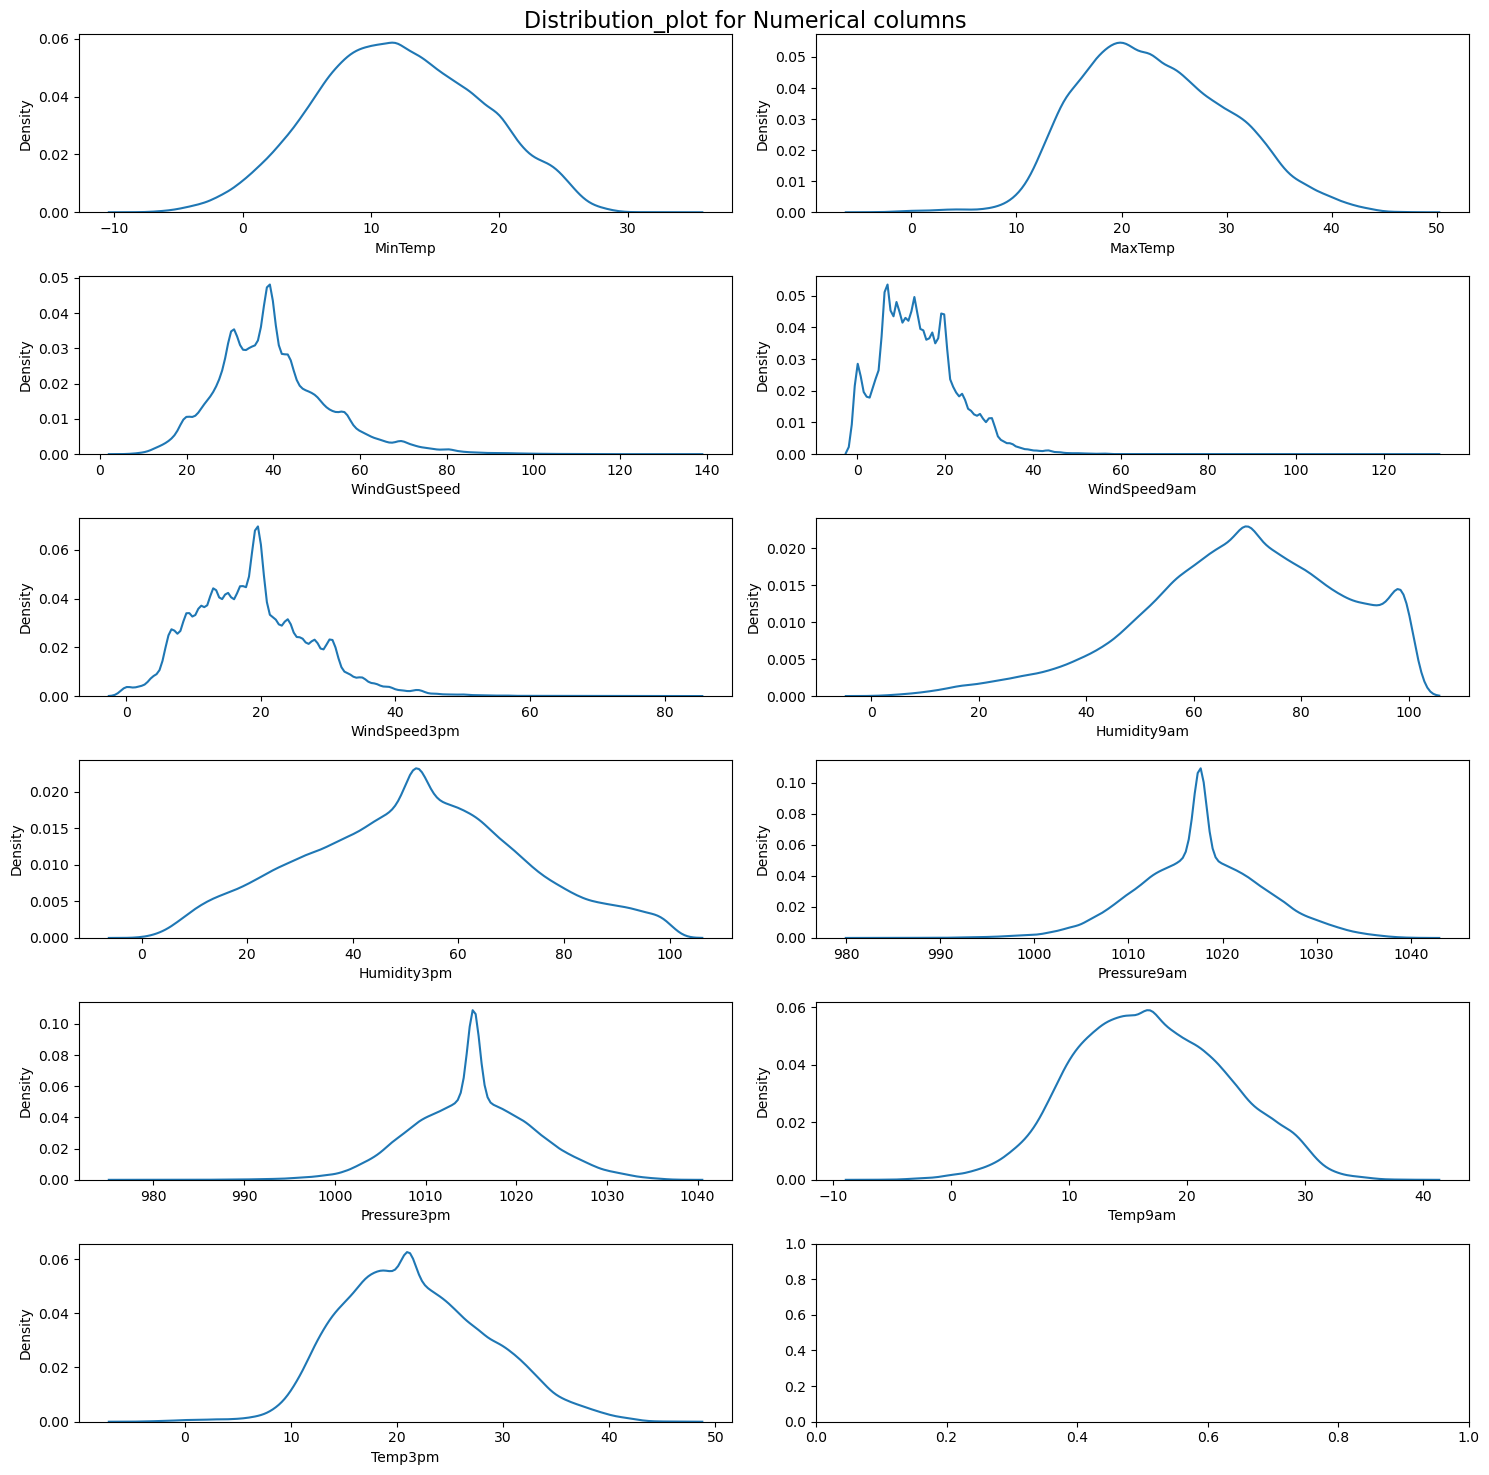

In [15]:
fig, axes = plt.subplots(6,2, figsize = (15, 15))

for column, ax in zip(numerical_column, axes.flatten()):
    sns.kdeplot(X_train[column], ax=ax)
    
fig.suptitle('Distribution_plot for Numerical columns', fontsize=16)
plt.tight_layout()
plt.show()

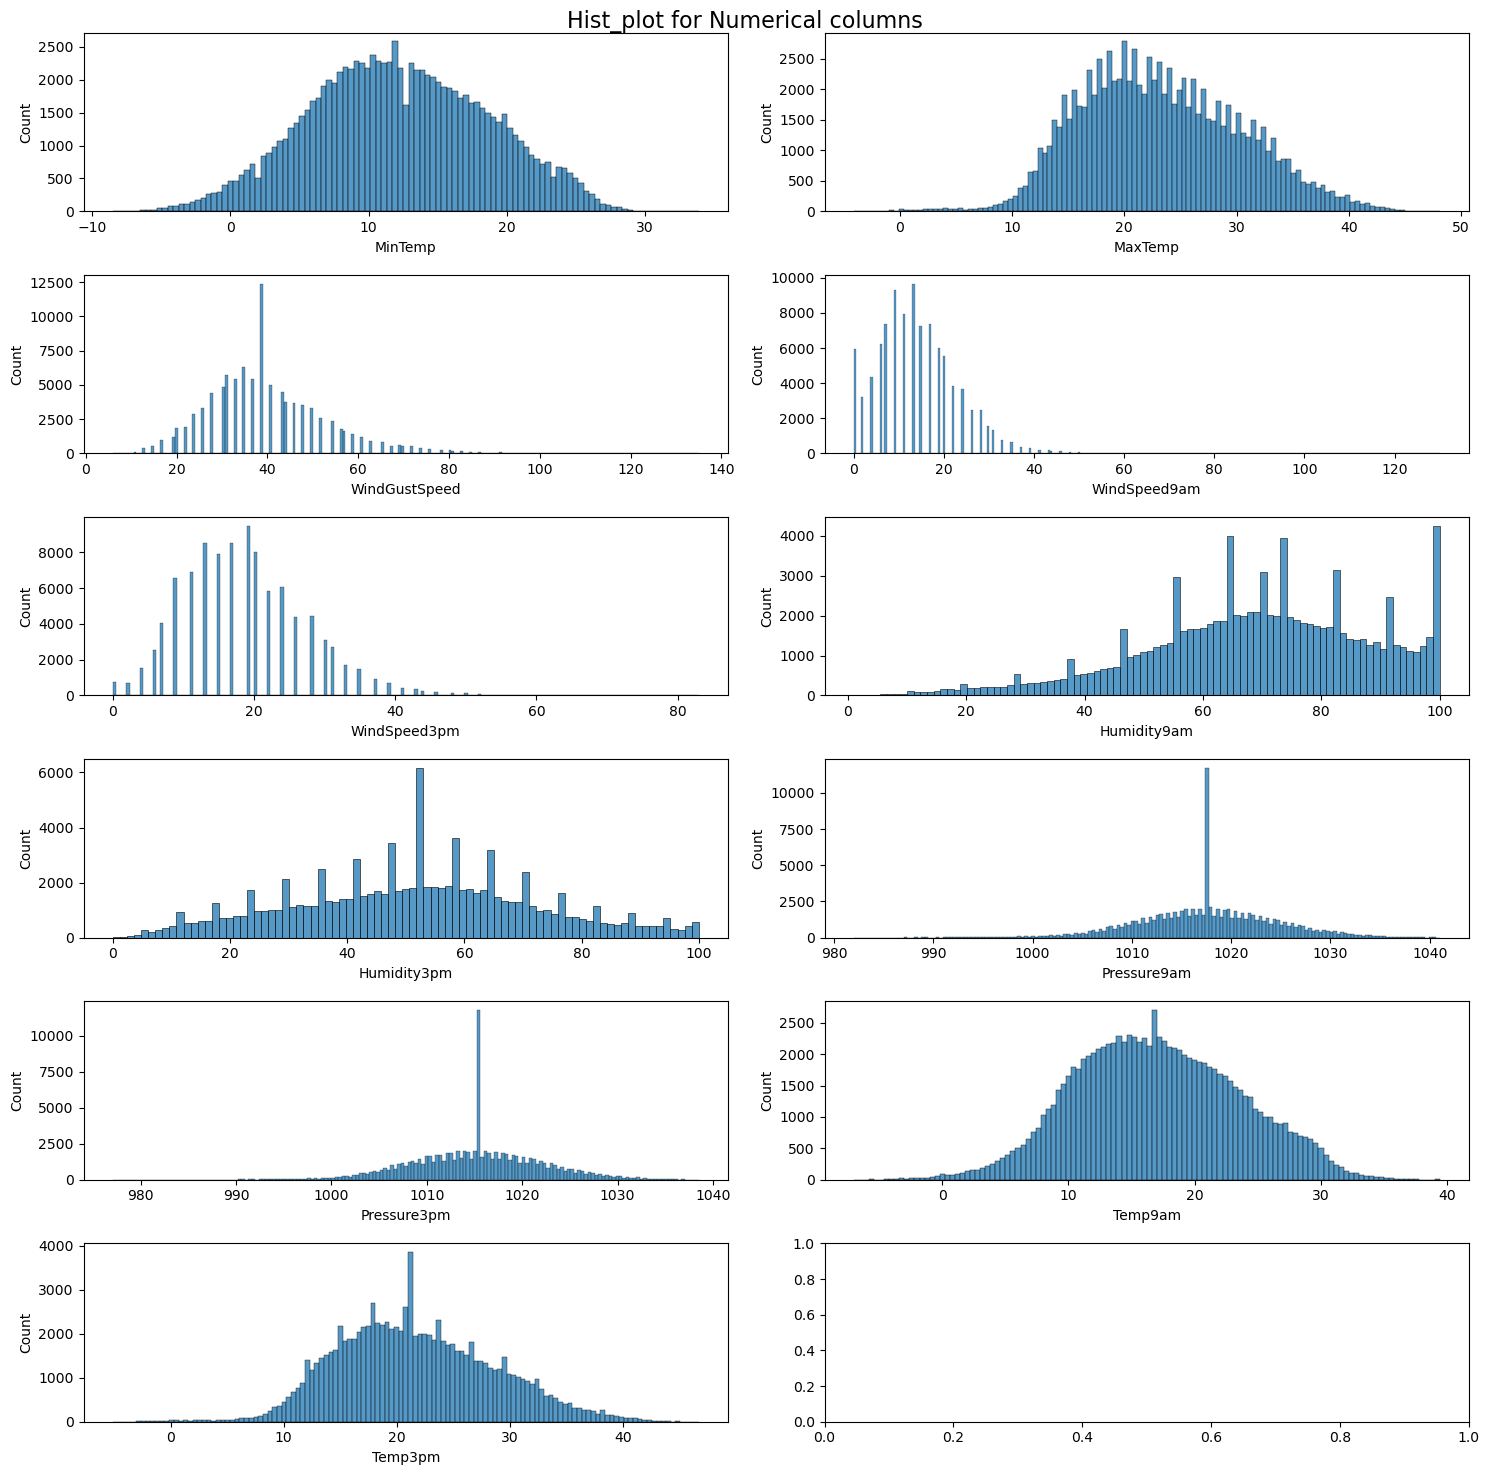

In [16]:
fig, axes = plt.subplots(6,2, figsize = (15, 15))

for column, ax in zip(numerical_column, axes.flatten()):
    sns.histplot(X_train[column], ax=ax)
    
fig.suptitle('Hist_plot for Numerical columns', fontsize=16)
plt.tight_layout()
plt.show()

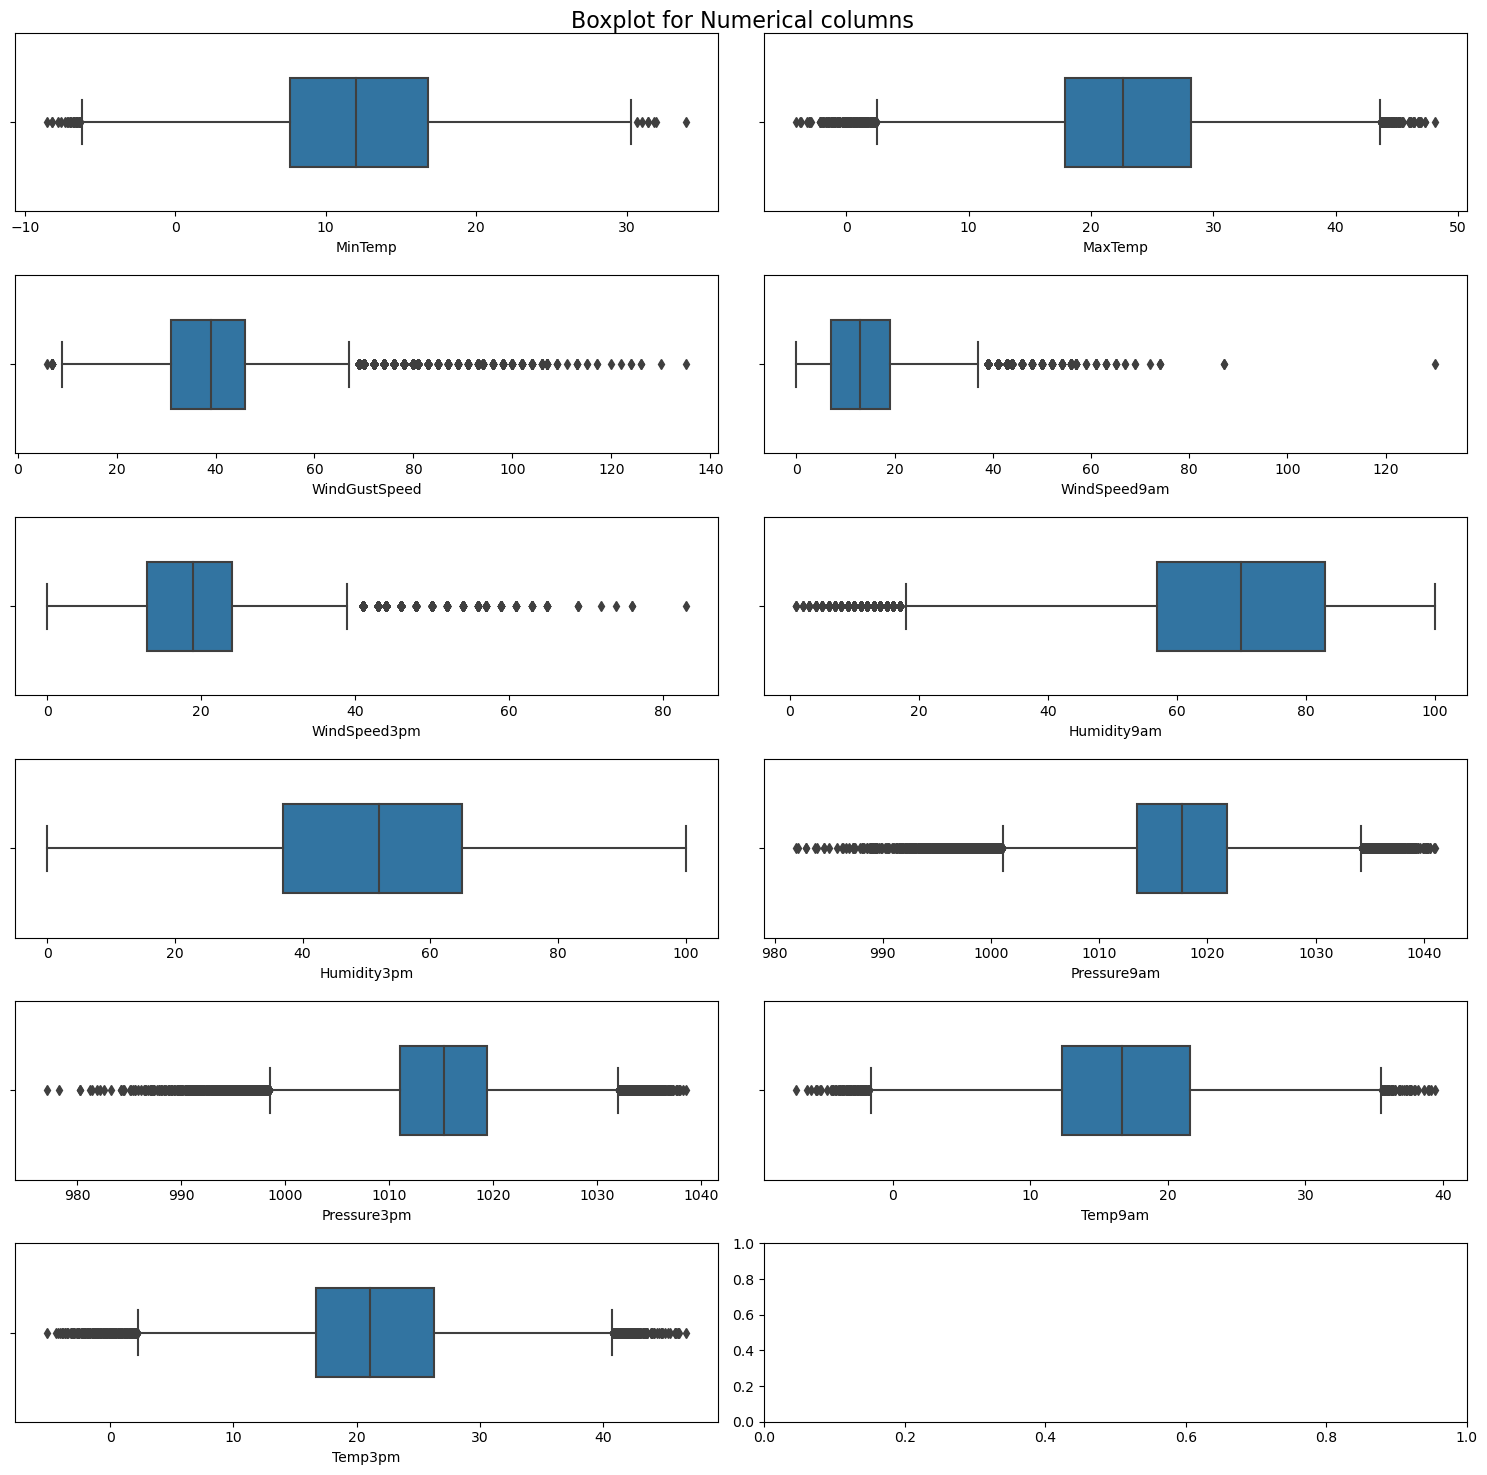

In [17]:
fig, axes = plt.subplots(6,2, figsize = (15, 15))

for column, ax in zip(numerical_column, axes.flatten()):
    sns.boxplot(x=column, data=X_train, width=0.5, orient='h', ax=ax)
    
fig.suptitle('Boxplot for Numerical columns', fontsize=16)
plt.tight_layout()
plt.show()

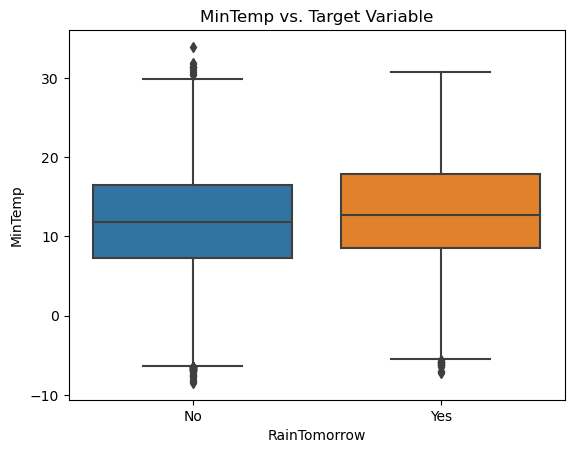

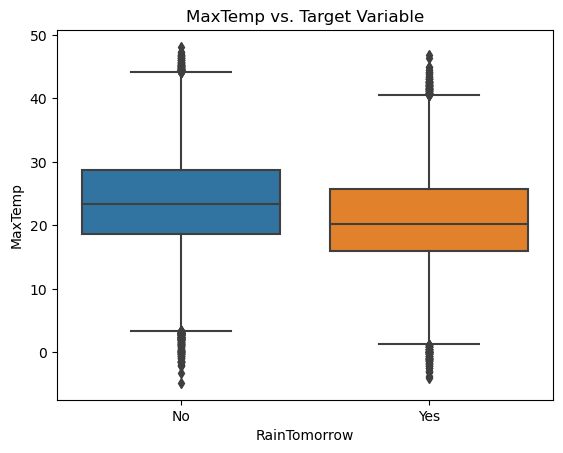

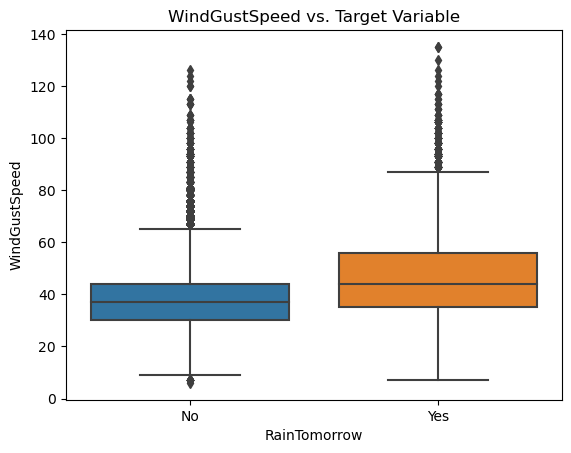

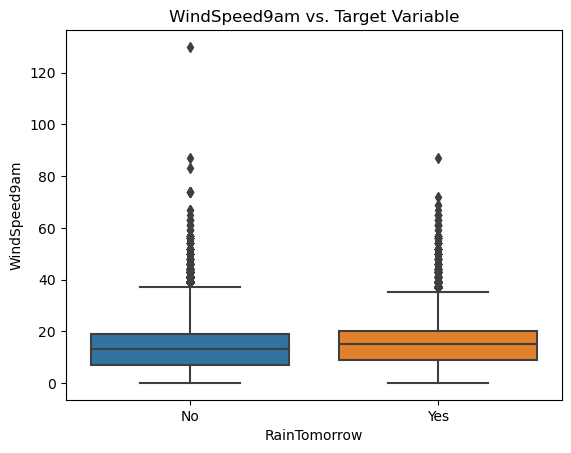

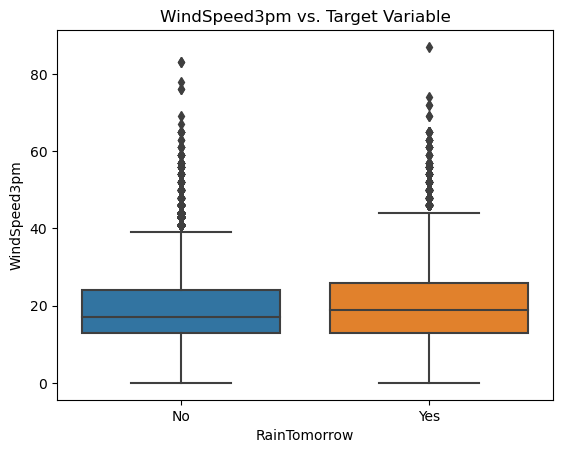

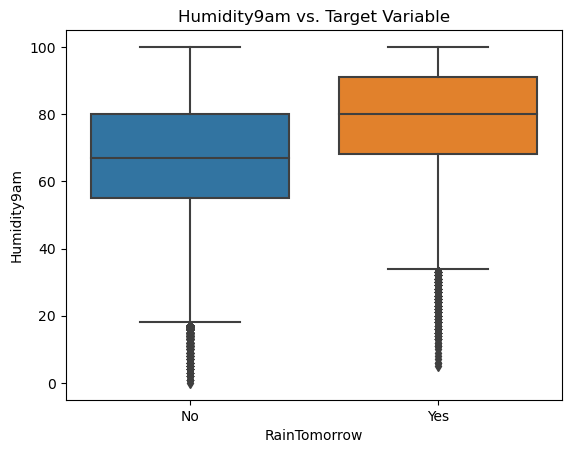

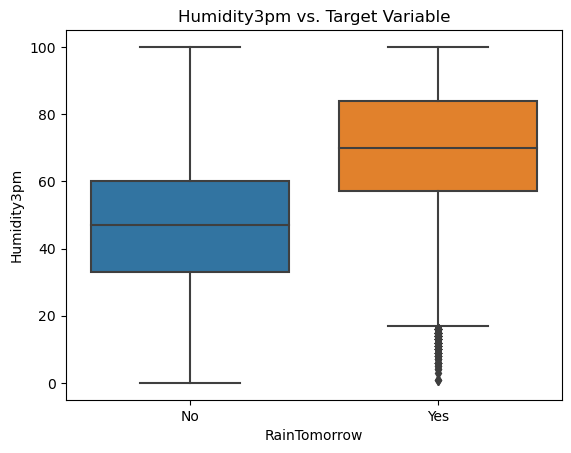

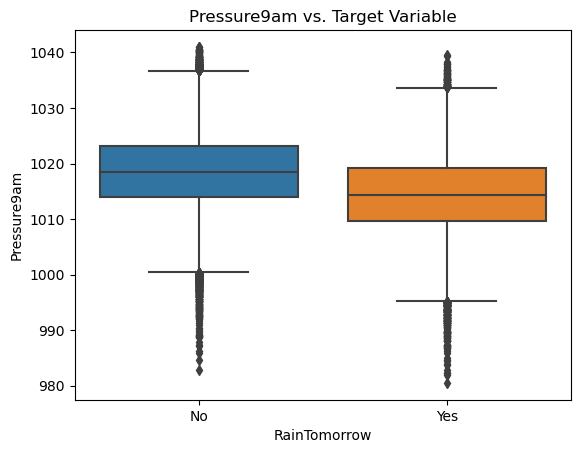

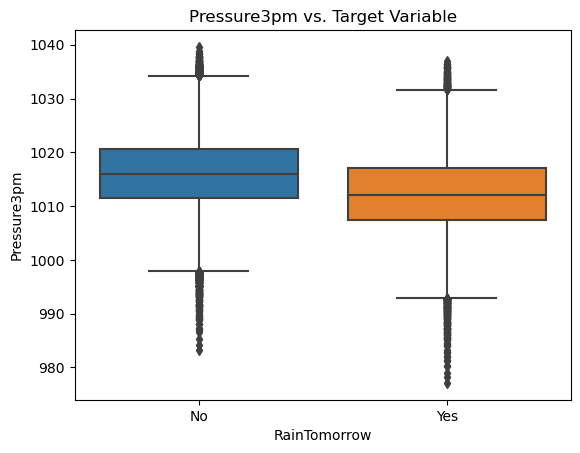

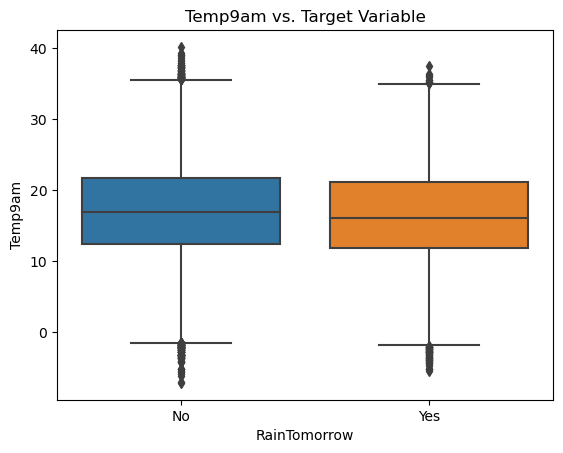

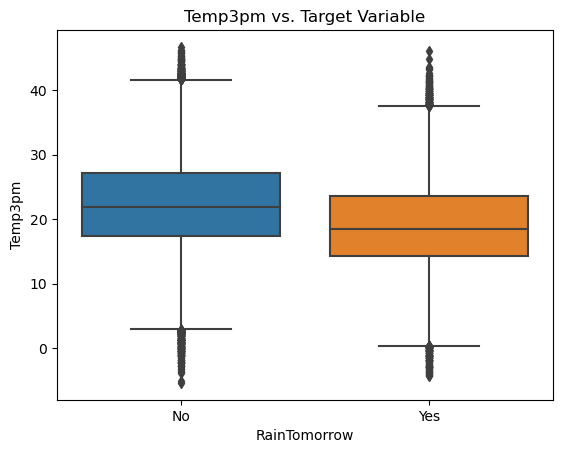

In [18]:
# Example: Box plots or violin plots for numerical features vs. target

# fig, axes = plt.subplots(6,2, figsize = (15, 15))

for column in numerical_column:
    sns.boxplot(x=rain_df['RainTomorrow'], y=rain_df[column])
    plt.title(f'{column} vs. Target Variable')
    plt.show()


### Outlier handling

In [19]:
norm_dis_features = ['MinTemp', 'MaxTemp', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
non_norm_dis_features = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am']

In [20]:
# for X_train
for column in non_norm_dis_features:
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerbound = Q1 - 1.5*IQR
    upperbound = Q1 + 1.5*IQR
#     outliers = (X_train[column] < lowerbound) | (X_train[column] > upperbound)
# #     print(lowerbound)
# #     print(outliers.value_counts())
#     median_value = X_train[column].median()
# #     print(median_value)
#     X_train.loc[outliers, column] = median_value
    X_train[column] = X_train[column].clip(lower=lowerbound, upper=upperbound)

# for X_test
for column in non_norm_dis_features:
    Q1 = X_test[column].quantile(0.25)
    Q3 = X_test[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerbound = Q1 - 1.5*IQR
    upperbound = Q1 + 1.5*IQR
#     outliers = (X_test[column] < lowerbound) | (X_test[column] > upperbound)
#     median_value = X_test[column].median()
#     X_test.loc[outliers, column] = median_value
    X_test[column] = X_test[column].clip(lower=lowerbound, upper=upperbound)

In [21]:
z_threshold = 2.5

# for X_train
for column in norm_dis_features:
    z_score = np.abs((X_train[column] - X_train[column].mean()) / X_train[column].std())
    outliers = z_score > z_threshold
#     print(outliers)
    median_value = X_train[column].median()
    X_train.loc[outliers, column] = median_value

# for X_test
for column in norm_dis_features:
    z_score = np.abs((X_test[column] - X_test[column].mean()) / X_test[column].std())
    outliers = z_score > z_threshold
#     print(outliers)
    median_value = X_test[column].median()
    X_test.loc[outliers, column] = median_value

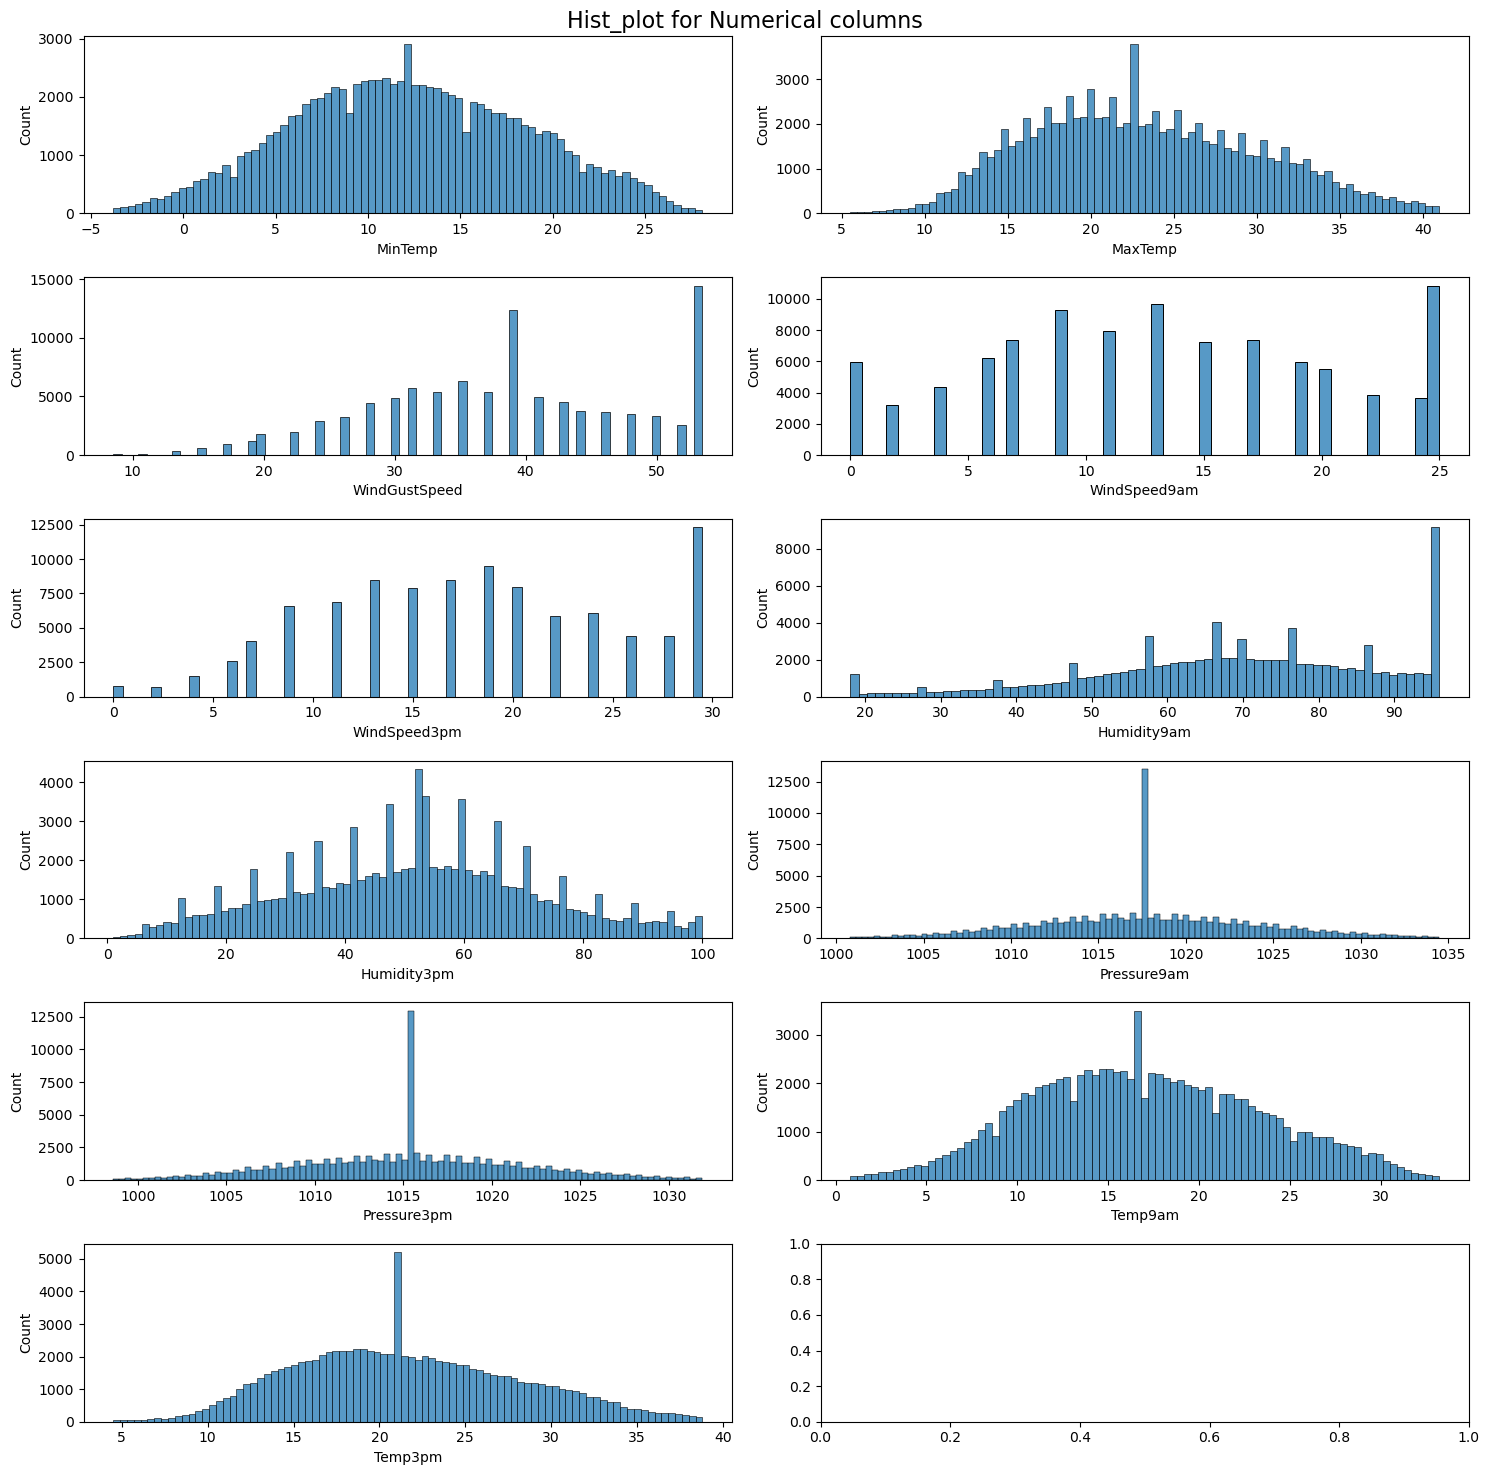

In [22]:
fig, axes = plt.subplots(6,2, figsize = (15, 15))

for column, ax in zip(numerical_column, axes.flatten()):
    sns.histplot(X_train[column], ax=ax)
    
fig.suptitle('Hist_plot for Numerical columns', fontsize=16)
plt.tight_layout()
plt.show()

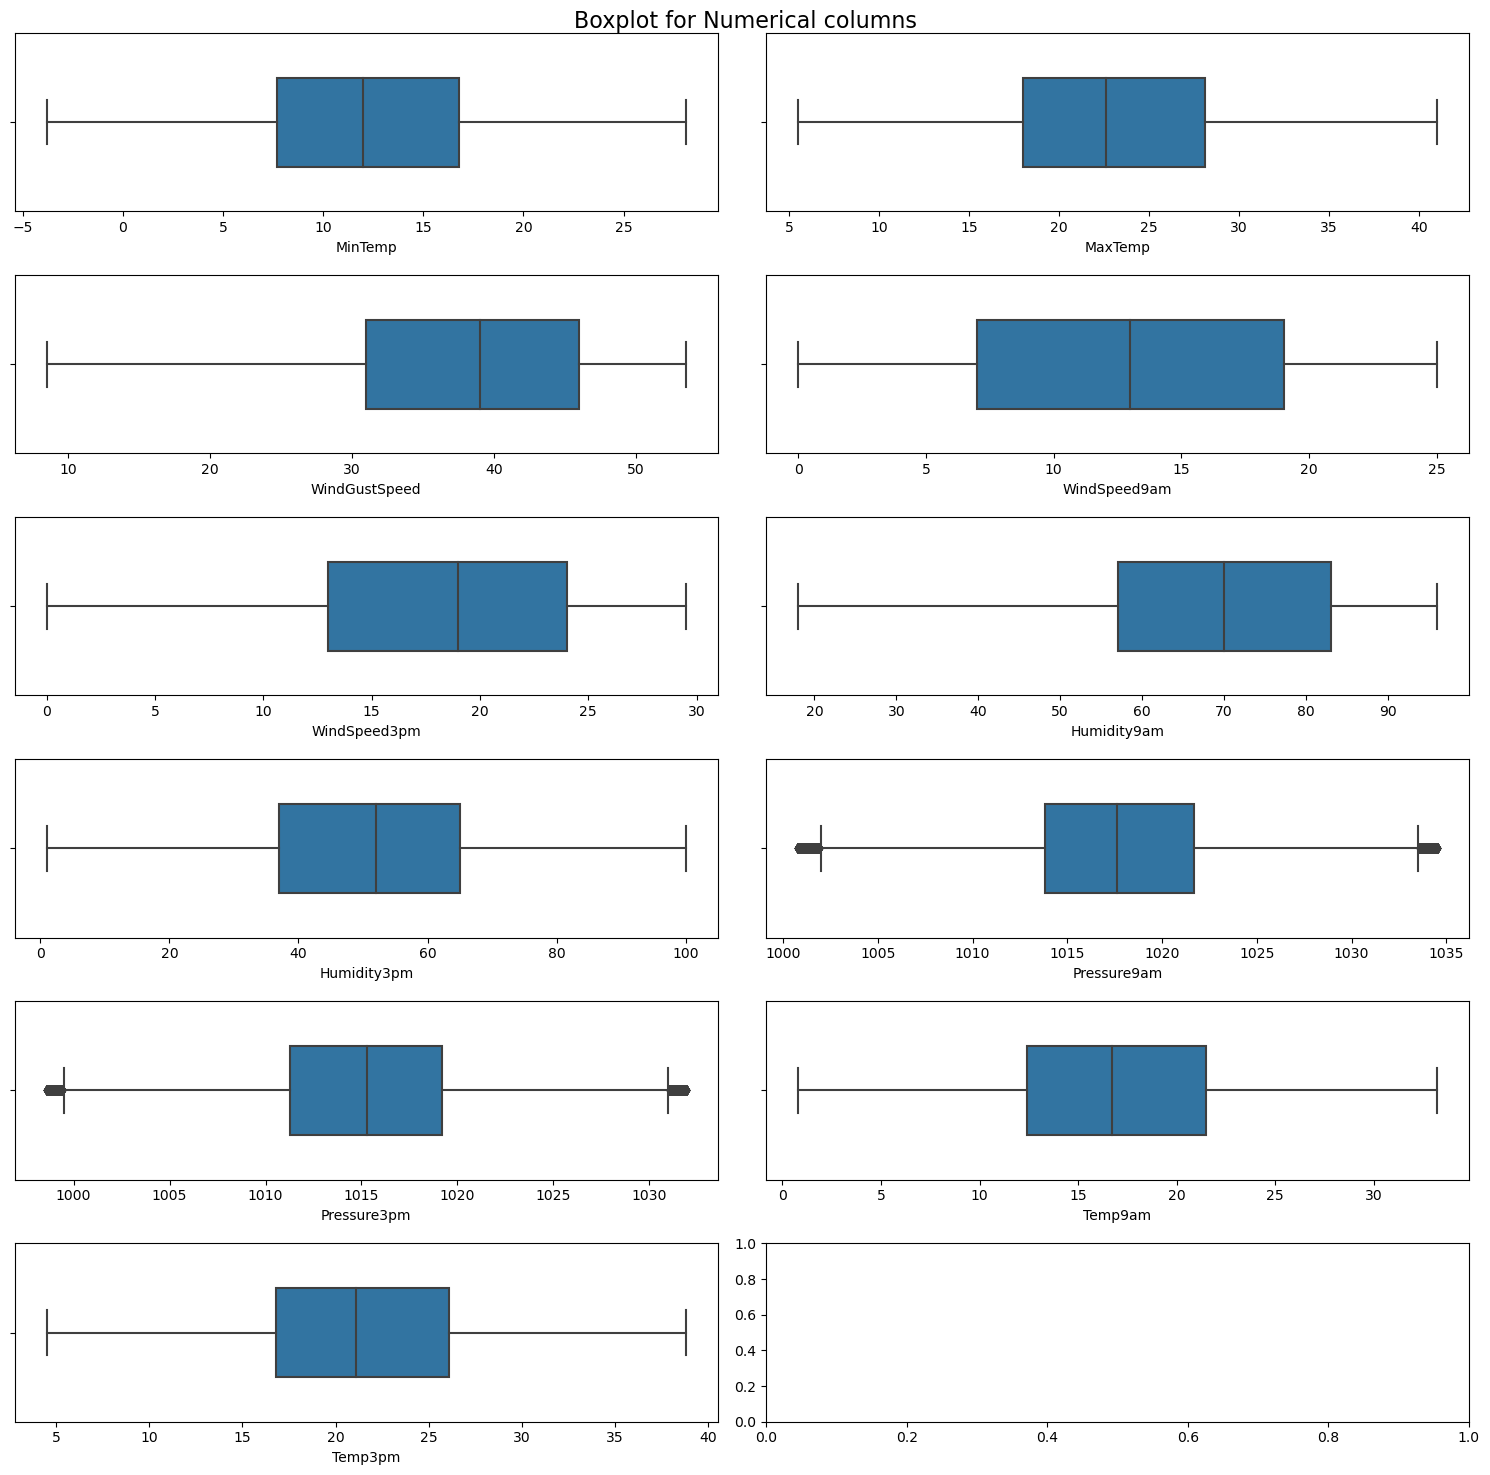

In [23]:
fig, axes = plt.subplots(6,2, figsize = (15, 15))

for column, ax in zip(numerical_column, axes.flatten()):
    sns.boxplot(x=column, data=X_train, width=0.5, orient='h', ax=ax)
    
fig.suptitle('Boxplot for Numerical columns', fontsize=16)
plt.tight_layout()
plt.show()

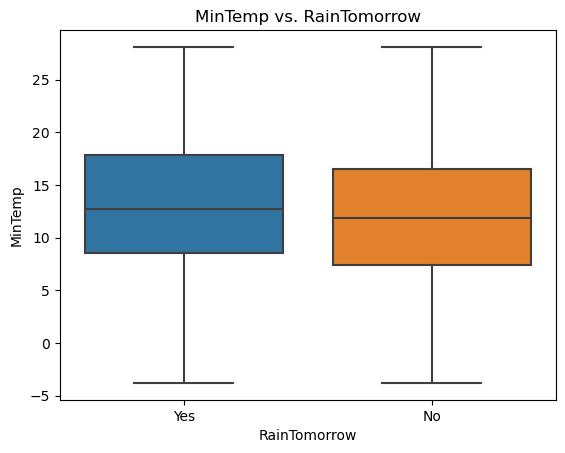

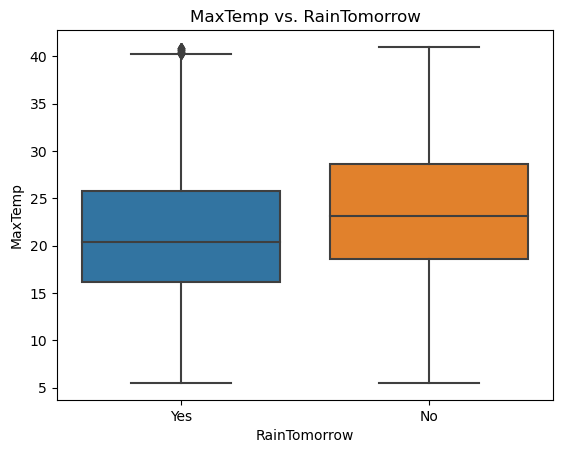

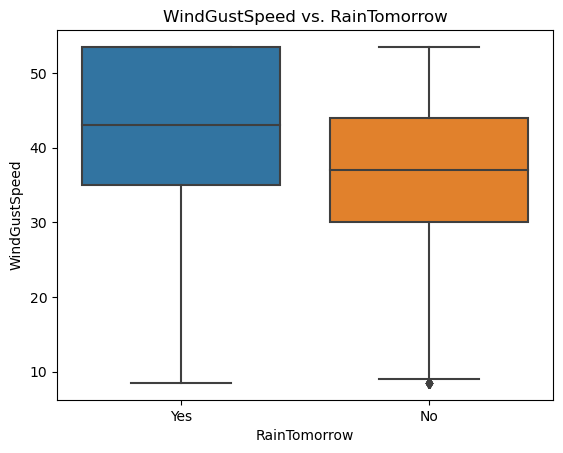

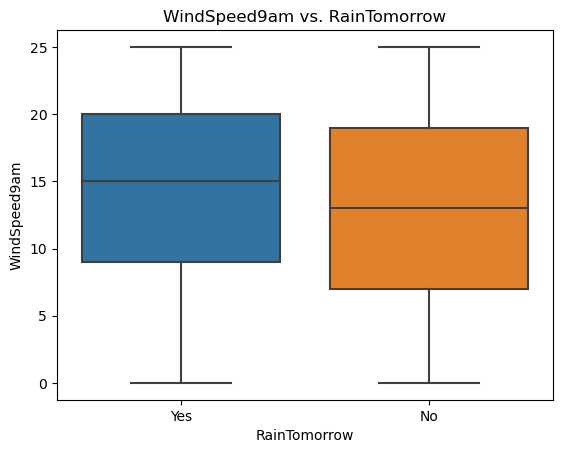

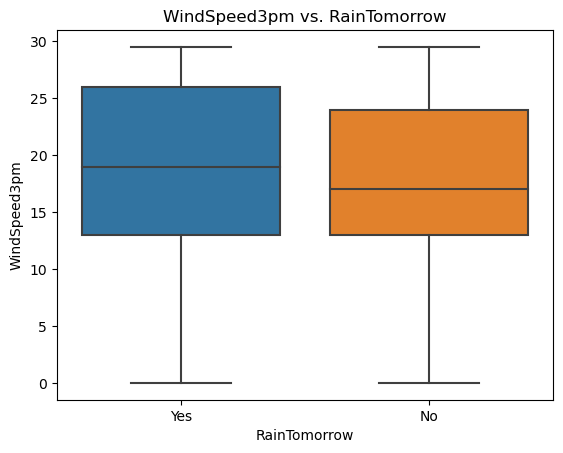

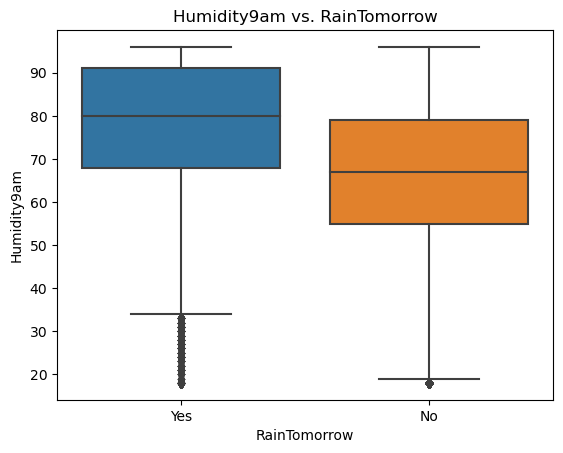

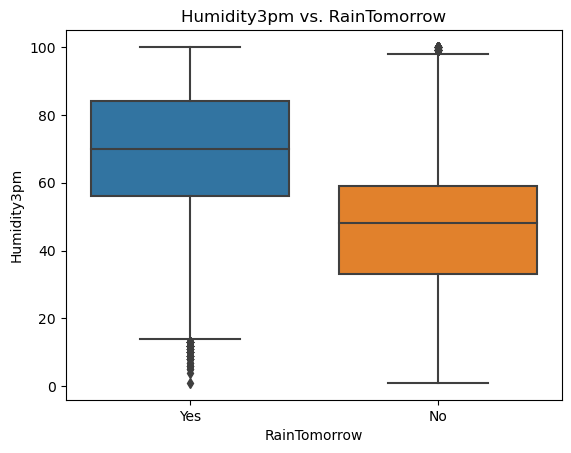

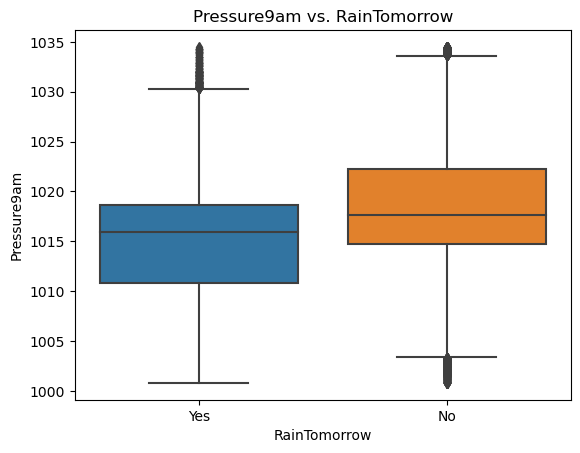

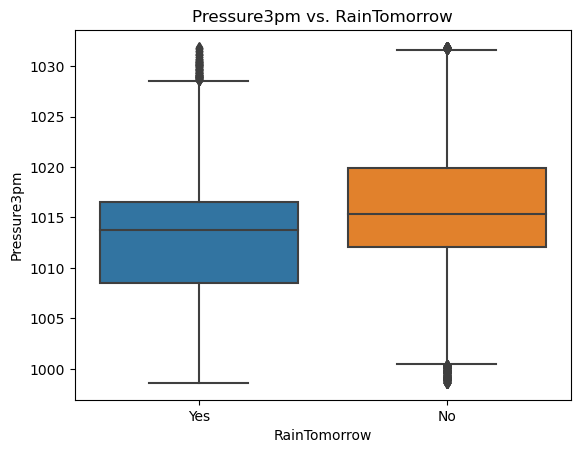

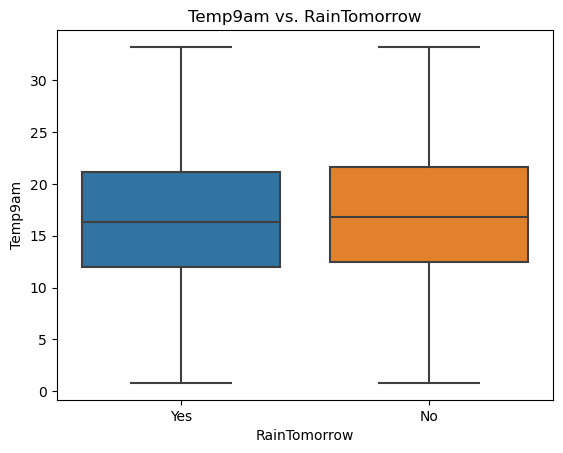

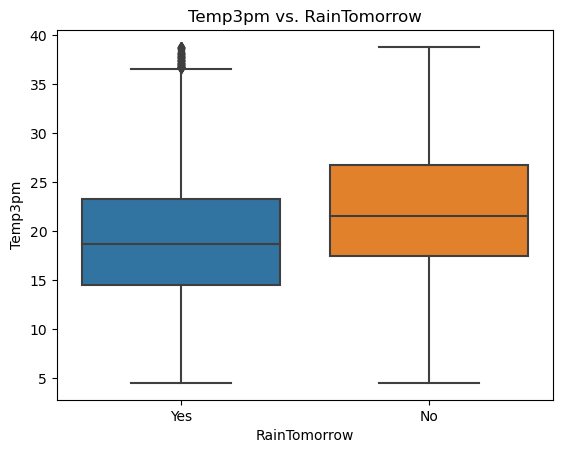

In [24]:
for column in numerical_column:
    sns.boxplot(x=y_train['RainTomorrow'], y=X_train[column])
    plt.title(f'{column} vs. RainTomorrow')
    plt.show()

### Encoding Categorical columns

In [25]:
# label_encoding of target and rain_today input variable
lc = LabelEncoder()
y_train['RainTomorrow'] = lc.fit_transform(y_train['RainTomorrow'])
y_test['RainTomorrow'] = lc.transform(y_test['RainTomorrow'])

lcX = LabelEncoder()
X_train['RainToday'] = lcX.fit_transform(X_train['RainToday'])
X_test['RainToday'] = lcX.transform(X_test['RainToday'])

In [26]:
# encoding the location column with target encoder to prevent overfitting

loc_encod = TargetEncoder(cols=['Location'])
X_train = loc_encod.fit_transform(X_train, y_train['RainTomorrow'])
X_test = loc_encod.transform(X_test, y_test['RainTomorrow'])

In [27]:
# one-hot encoding of remaining categorical columns 

trainX = pd.get_dummies(X_train[['WindGustDir', 'WindDir9am', 'WindDir3pm']], prefix = ['WGDir', 'WD9am', 'WD3pm'], drop_first=True, dtype=int)
X_train = pd.concat([X_train, trainX], axis=1)

testX = pd.get_dummies(X_test[['WindGustDir', 'WindDir9am', 'WindDir3pm']], prefix = ['WGDir', 'WD9am', 'WD3pm'], drop_first=True, dtype=int)
X_test = pd.concat([X_test, testX], axis=1)

# dropping the original column
X_train = X_train.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
X_test = X_test.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

In [28]:
# X_test.shape

In [29]:
scaler = MinMaxScaler()
col = X_train.columns

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[col])
X_test = pd.DataFrame(X_test, columns=[col])

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=42, solver='liblinear')

In [31]:
# predicting rainfall occurence for testing data
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
print(accuracy_score(y_test, y_pred))

0.8387906338044843


In [33]:
# predicting rainfall occurence for training data
y_pred_train = log_reg.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 1])

In [34]:
print(accuracy_score(y_train, y_pred_train))

0.841501775748351


In [35]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[31051,  1769],
       [ 5040,  4377]], dtype=int64)

<Axes: >

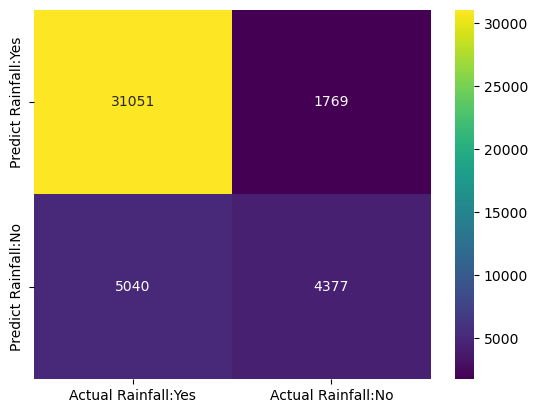

In [36]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Rainfall:Yes', 'Actual Rainfall:No'], 
                                 index=['Predict Rainfall:Yes', 'Predict Rainfall:No'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

### KNN - clasification

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=15)

In [38]:
y_pred_train_knn = knn.predict(X_train)
y_pred_knn = knn.predict(X_test)

In [39]:
print(accuracy_score(y_train, y_pred_train_knn))
print(accuracy_score(y_test, y_pred_knn))

0.8261085743277524
0.8045315718445912


In [40]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[31417,  1403],
       [ 6853,  2564]], dtype=int64)

<Axes: >

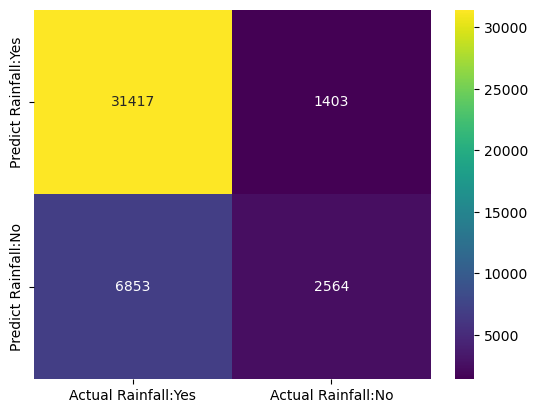

In [41]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Rainfall:Yes', 'Actual Rainfall:No'], 
                                 index=['Predict Rainfall:Yes', 'Predict Rainfall:No'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier  = RandomForestClassifier(max_depth=11, n_estimators=40, criterion='gini', random_state = 42)
rf_classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=11, n_estimators=40, random_state=42)

In [43]:
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_rf = rf_classifier.predict(X_test)

In [44]:
print(accuracy_score(y_test, y_pred_rf))
print(accuracy_score(y_train, y_pred_train_rf))

0.8448516703364349
0.8654895991882293


In [45]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[31730,  1090],
       [ 5463,  3954]], dtype=int64)

<Axes: >

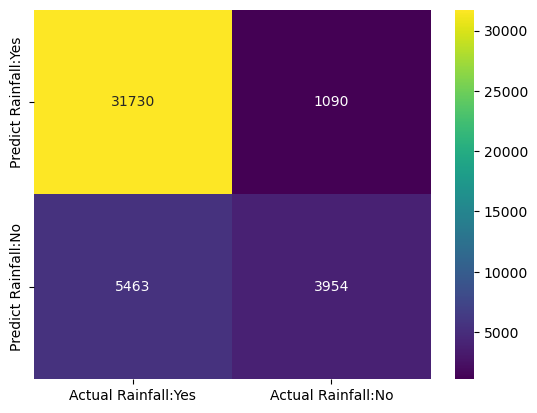

In [46]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Rainfall:Yes', 'Actual Rainfall:No'], 
                                 index=['Predict Rainfall:Yes', 'Predict Rainfall:No'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

In [47]:
feature_importances = rf_classifier.feature_importances_

In [48]:
feature_importances

array([0.03796172, 0.03950614, 0.03399837, 0.06123161, 0.01233943,
       0.0166234 , 0.07793945, 0.36555495, 0.05554218, 0.06450411,
       0.0284542 , 0.0541098 , 0.09158771, 0.00093212, 0.00079561,
       0.00188966, 0.00150818, 0.00128263, 0.00164759, 0.00172705,
       0.00120419, 0.00090016, 0.00089032, 0.00113281, 0.00097324,
       0.00228935, 0.00142118, 0.00099621, 0.00074288, 0.0007653 ,
       0.00292955, 0.00101806, 0.00215083, 0.00159163, 0.00144757,
       0.0010601 , 0.00100186, 0.00094973, 0.00090382, 0.00101736,
       0.00133775, 0.00114818, 0.00112491, 0.00074138, 0.00089924,
       0.00280955, 0.00149093, 0.00149972, 0.00263446, 0.00220288,
       0.00125484, 0.00088349, 0.00108377, 0.00113383, 0.0010816 ,
       0.00134314, 0.001604  , 0.00120424])

Feature Importance Ranking:
1. Feature 8: 0.3655549499764314
2. Feature 13: 0.09158771262407032
3. Feature 7: 0.07793945470192695
4. Feature 10: 0.06450411278632376
5. Feature 4: 0.0612316083788336
6. Feature 9: 0.055542183653021805
7. Feature 12: 0.05410979946558999
8. Feature 2: 0.03950614447366874
9. Feature 1: 0.03796171636009606
10. Feature 3: 0.03399837042208448
11. Feature 11: 0.02845419612833806
12. Feature 6: 0.01662340161418432
13. Feature 5: 0.012339430866400315
14. Feature 31: 0.0029295541101531175
15. Feature 46: 0.002809551369980361
16. Feature 49: 0.0026344600558186036
17. Feature 26: 0.002289347471450297
18. Feature 50: 0.0022028788608421364
19. Feature 33: 0.002150834297071265
20. Feature 16: 0.0018896614389055343
21. Feature 20: 0.0017270472793676692
22. Feature 19: 0.0016475884557702034
23. Feature 57: 0.001604001476510062
24. Feature 34: 0.0015916252150087243
25. Feature 17: 0.001508183439140257
26. Feature 48: 0.0014997208484973032
27. Feature 47: 0.001490927951259

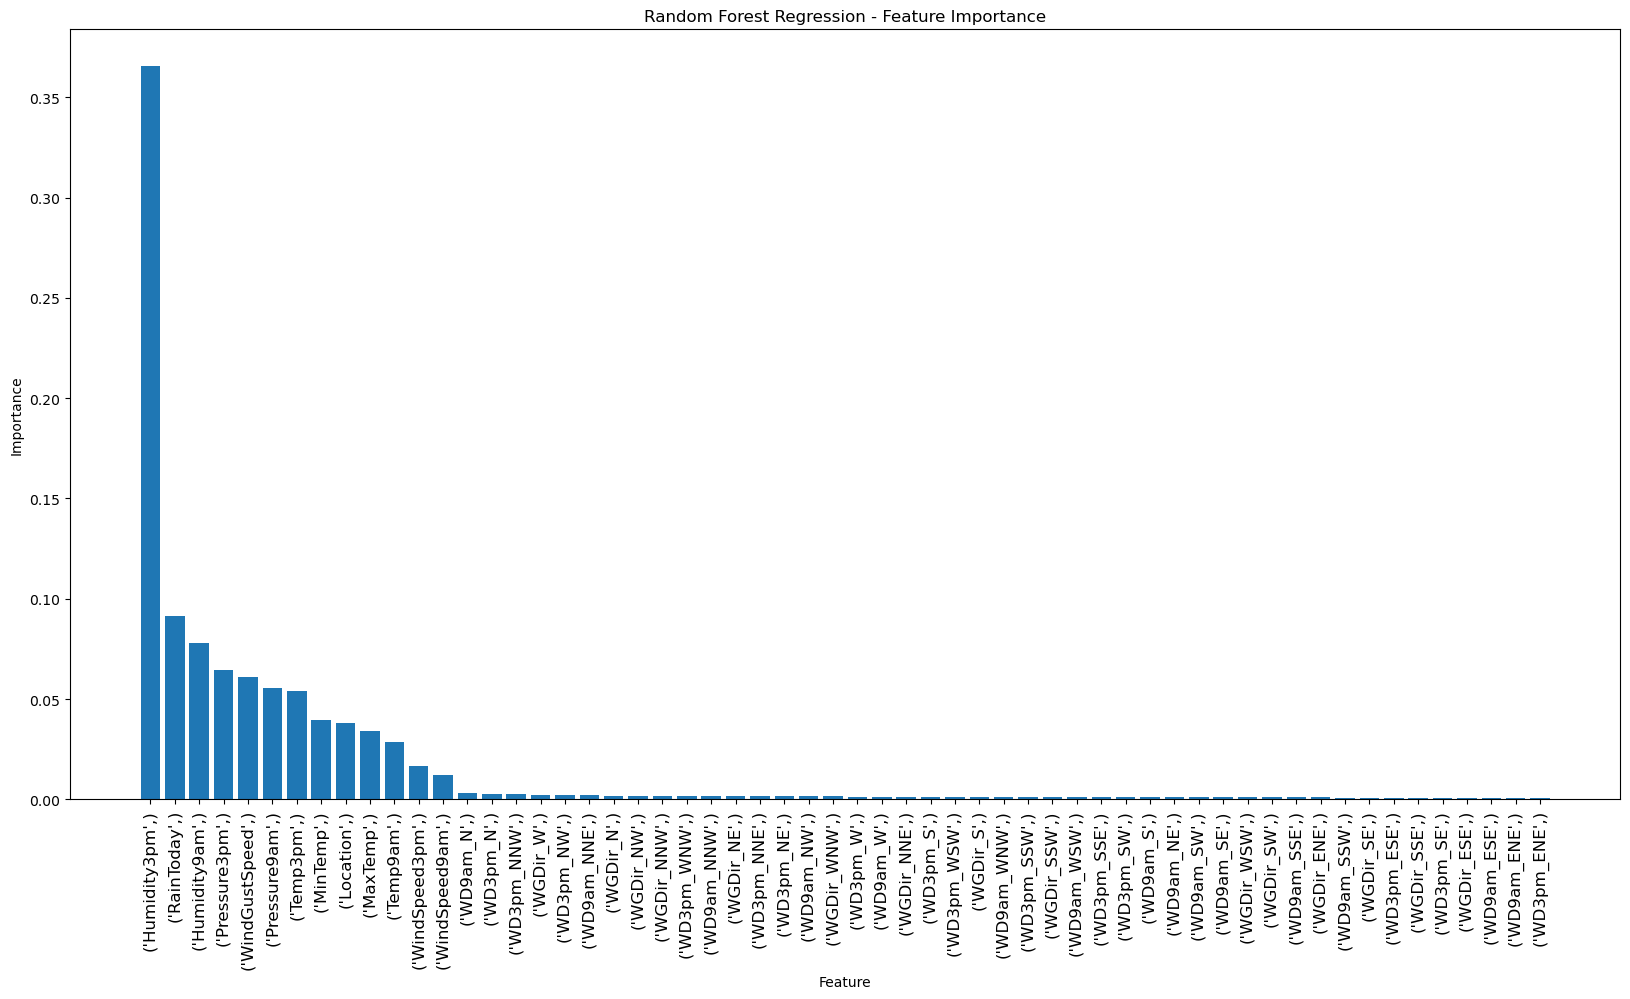

In [50]:
# Get the indices of the sorted feature importances
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importance ranking
print("Feature Importance Ranking:")
for i, idx in enumerate(sorted_indices):
    print(f"{i + 1}. Feature {idx + 1}: {feature_importances[idx]}")

# Plot the feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[sorted_indices], rotation=90, fontsize=12)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Regression - Feature Importance")
plt.show()

#### So, we obtained that Humidity is the most influential parameter for the prediction of occuerence of the Rainfall, followed by RainToday and Pressure.